In [14]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as mtick


In [15]:
# đọc file data.
df = pd.read_csv('./movies.csv')

In [16]:
# # Xem dữ liệu
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
#Kiểm tra các cột xem có cột nào có giá trị NAN không?
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
# Kiểm tra có bất kỳ dữ liệu bị thiếu nào không
for i in df.columns:
    pct_missing = np.mean(df[i].isnull())
    print('{} - {}%'.format(i, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [19]:
# Sửa các giá trị có giá trị bằng 0 trong các cột
# Cột budget
for i in df.index:
    if df.loc[i, 'budget'] == 0:
        df.loc[i, 'budget'] = pd.NaT
# # Cột gross
for i in df.index:
    if df.loc[i, 'gross'] == 0:
        df.loc[i, 'gross'] = pd.NaT

In [20]:
#Sửa các giá trị bị thiếu trong các cột
# # Thay thê các giá trị trống bằng giá trị Median  của mỗi cột
median_budget = df['budget'].median()
df['budget'].fillna(median_budget, inplace=True)
median_gross = df['gross'].median()
df['gross'].fillna(median_gross, inplace=True)

In [21]:
# Xóa các hàng khi cột name bị để trống
df.dropna(subset=['name'], inplace=True)

In [22]:
# Kiểm tra kiểu dữ liệu cho các cột
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
# Thay đổi loại dữ liệu của cột budget và gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [24]:
# Hiện thị thông tin Top 10 bộ phim có điểm bình chọn trung bình cao nhất
df_top10_vote_average = df.sort_values(by = ['score'], inplace = False, ascending = False)
df_top10_vote_average.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072,New Line Cinema,178.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139.0
4048,The Lord of the Rings: The Two Towers,PG-13,Action,2002,"December 18, 2002 (United States)",8.7,1500000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,947495095,New Line Cinema,179.0


In [25]:
# Hiện thị thông tin Top 10 bộ phim doanh thu  cao nhất
df_top10_gross = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df_top10_gross.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


In [26]:
# Hiện thị thông tin Top 10 bộ phim doanh thu  thấp nhất
df_top10_gross_short = df.sort_values(by = ['gross'], inplace = False, ascending = True)
df_top10_gross_short.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,20500000,1605,Balboa Entertainment,110.0
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,20500000,1672,Polygram Filmed Entertainment,87.0
5524,Now & Later,Unrated,Drama,2009,"February 18, 2011 (United States)",5.1,1600.0,Philippe Diaz,Philippe Diaz,Keller Wortham,United States,20500000,1808,Cinema Libre Studio,99.0
6030,Angels Crest,R,Drama,2011,"December 30, 2011 (United States)",5.8,1900.0,Gaby Dellal,Leslie Schwartz,Thomas Dekker,Canada,20500000,2037,Process Film,92.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [27]:
# Hiện thị thông tin Top 10 bộ phim có ngân sách thực hiện thấp nhất
df_top10_budget_short = df.sort_values(by = ['budget'], inplace = False, ascending = True)
df_top10_budget_short.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,"October 31, 1983 (United States)",5.0,275.0,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000,20205757,Pirromount Pictures,80.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20205757,Notis Studio,78.0
3318,Following,R,Crime,1998,"November 5, 1999 (United Kingdom)",7.5,89000.0,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,NaN,90.0
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0
327,Boardinghouse,R,Comedy,1982,"October 21, 1983 (United States)",3.8,651.0,John Wintergate,John Wintergate,John Wintergate,United States,10000,20205757,Blustarr,98.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,20205757,NaN,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,20205757,NaN,120.0
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0


In [28]:
# Hiện thị thông tin Top 10 bộ phim có ngân sách thực hiện cao nhất.
df_top10_budget = df.sort_values(by = ['budget'], inplace = False, ascending = False)
df_top10_budget.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000.0,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135.0
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000.0,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141.0
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000.0,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100.0


In [29]:
# Hiện thị thông tin Top 10 bộ phim có lượt vote nhiều nhất .
df_top10_vote = df.sort_values(by = ['votes'], inplace = False, ascending = False)
df_top10_vote.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072,New Line Cinema,178.0
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,63000000,466364845,Warner Bros.,136.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
6444,Interstellar,PG-13,Adventure,2014,"November 7, 2014 (United States)",8.6,1600000.0,Christopher Nolan,Jonathan Nolan,Matthew McConaughey,United States,165000000,701729206,Paramount Pictures,169.0


In [42]:
# Tính tỷ trọng doanh thu cho các loại phim trong năm 2020
summary_df = df[df['year'] == 2020].groupby('genre').agg({
    'gross': 'sum',
    'budget': 'sum'
}).reset_index()
summary_df['budget_rate'] = summary_df['budget'] / summary_df['gross'] * 100

In [43]:
# Lấy 5 loại phim có tỷ trọng lợi nhuận cao nhất năm 2020
top_10 = summary_df.sort_values(by='budget_rate', ascending=False).head(5)

# # Xuất danh sách 5 loại phim
print("Danh sách 5 loại phim mang về tỷ trọng lợi nhuận cao nhất  năm 2020:")
print(top_10['genre'])

Danh sách 5 loại phim mang về tỷ trọng lợi nhuận cao nhất  năm 2020:
4        Crime
6       Horror
3       Comedy
1    Adventure
0       Action
Name: genre, dtype: object


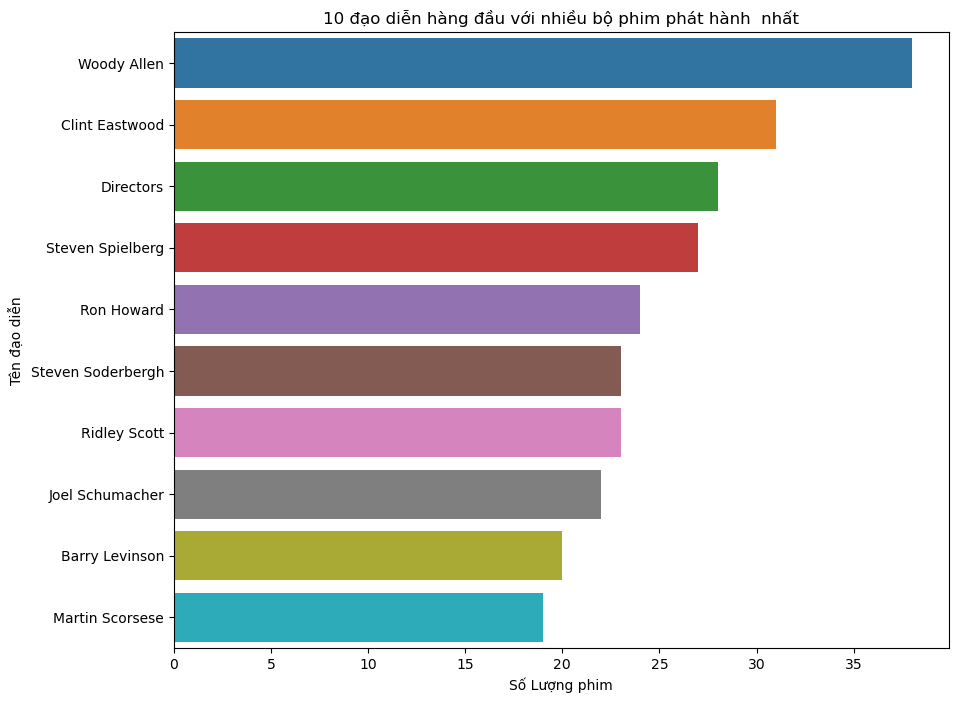

In [32]:
#10 đạo diễn hàng đầu với nhiều bộ phim phát hành  nhất
director_counts = df['director'].value_counts().sort_values(ascending=False)
director_counts_df = director_counts.to_frame().reset_index()
director_counts_df.columns = ['director', 'count']
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='director', data=director_counts_df.head(10))
plt.title('10 đạo diễn hàng đầu với nhiều bộ phim phát hành  nhất')
plt.xlabel('Số Lượng phim')
plt.ylabel('Tên đạo diễn')
plt.show()

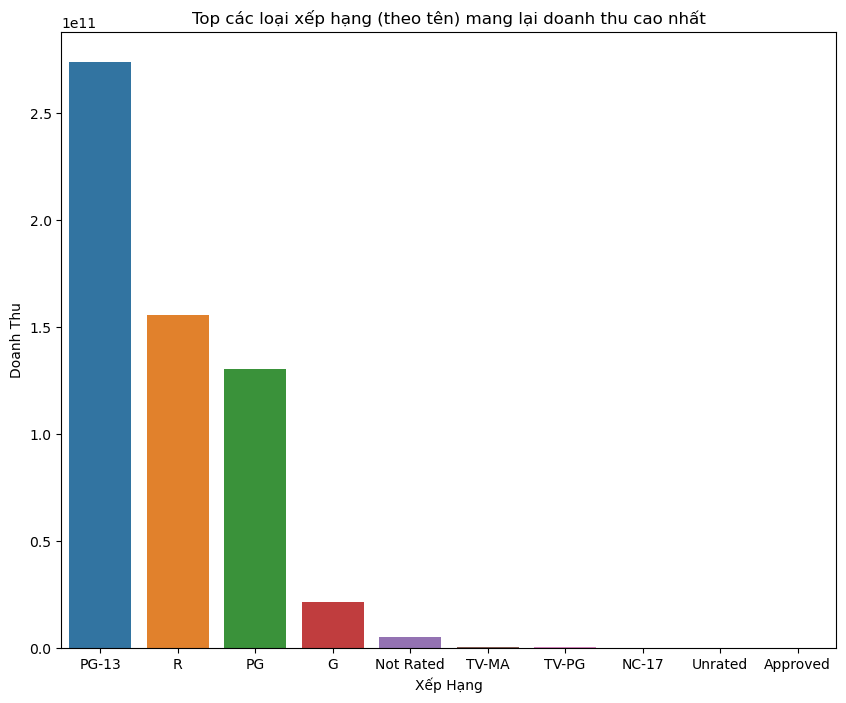

In [33]:
#Tạo biểu đồ hiển thị top 10 các loại xếp hạng (theo tên) mang lại doanh thu cao nhất.
revenue_by_rating = df.groupby('rating')['gross'].sum().sort_values(ascending=False)
top_revenue_ratings = revenue_by_rating.head(10) # Lấy 10 loại xếp hạng có doanh thu cao nhất
plt.figure(figsize=(10, 8))
sns.barplot(x=top_revenue_ratings.index, y=top_revenue_ratings.values)
plt.title('Top các loại xếp hạng (theo tên) mang lại doanh thu cao nhất')
plt.xlabel('Xếp Hạng')
plt.ylabel('Doanh Thu')
plt.show()

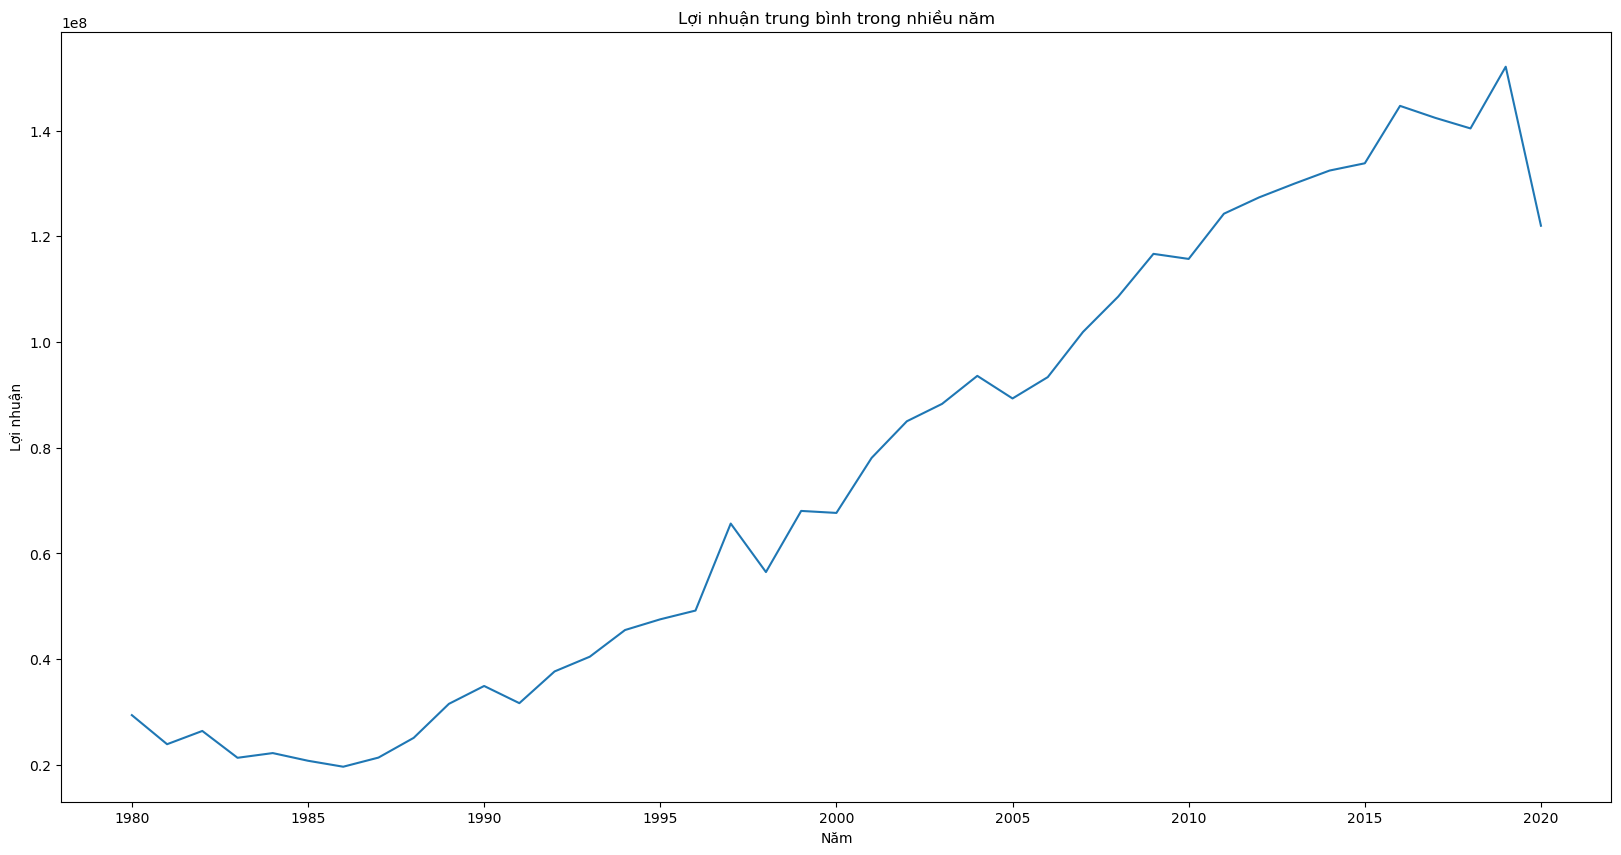

In [34]:
# #Lợi nhuận phim thay đổi như thế nào trong nhiều năm?
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='gross', data=df, ci=None)
plt.title("Lợi nhuận trung bình trong nhiều năm")
plt.xlabel("Năm")
plt.ylabel("Lợi nhuận")
plt.show()

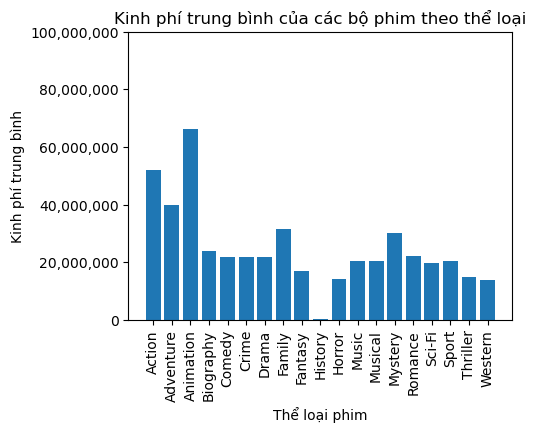

In [35]:
# # Tạo bảng dữ liệu mới chỉ chứa thông tin về kinh phí và thể loại của các bộ phim
budget_by_genre = df[['budget', 'genre']]
# # Tính kinh phí trung bình của các bộ phim theo thể loại
budget_by_genre = budget_by_genre.groupby('genre').mean()
# # Tạo biểu đồ cột thể hiện kinh phí trung bình của các bộ phim theo thể loại
fig = plt.figure()
ax = fig.add_axes([0.2, 0.3, 0.6, 0.6], facecolor='white')
ax.bar(budget_by_genre.index, budget_by_genre['budget'])
y_fmt = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim([0, 10e7])
plt.xticks(rotation=90)
plt.xlabel('Thể loại phim')
plt.ylabel('Kinh phí trung bình')
plt.title('Kinh phí trung bình của các bộ phim theo thể loại')
plt.show()


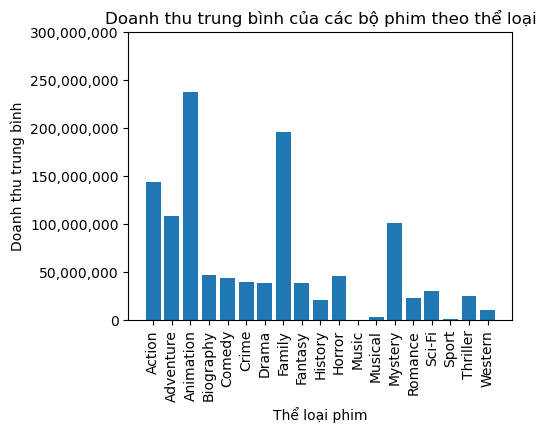

In [36]:
# Tạo bảng dữ liệu  chứa thông tin về doanh thu và thể loại của các bộ phim
gross_by_genre = df[['gross', 'genre']]
# Tính doanh thu trung bình của các bộ phim theo thể loại
gross_by_genre = gross_by_genre.groupby('genre').mean()
# Tạo biểu đồ cột thể hiện doanh thu trung bình của các bộ phim theo thể loại
fig = plt.figure()
ax = fig.add_axes([0.2, 0.3, 0.6, 0.6], facecolor='white')
ax.bar(gross_by_genre.index, gross_by_genre['gross'])
y_fmt = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim([0, 3e8])
plt.xticks(rotation=90)
plt.xlabel('Thể loại phim',fontsize=10)
plt.ylabel('Doanh thu trung bình')
plt.title('Doanh thu trung bình của các bộ phim theo thể loại')
plt.show()


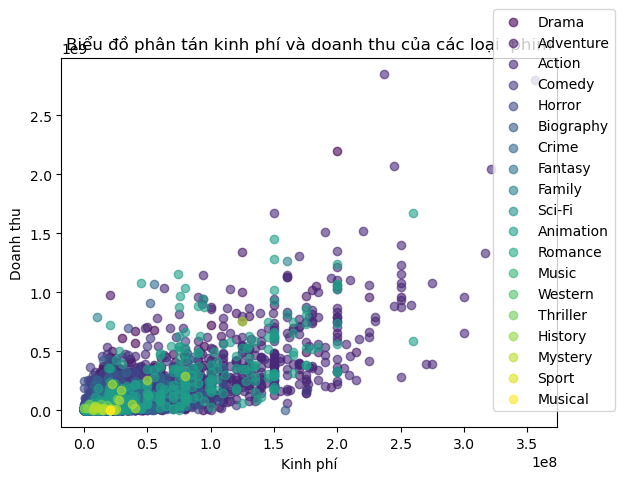

In [37]:
# Tạo bảng dữ liệu mới chỉ chứa thông tin về kinh phí và doanh thu của các bộ phim
budget_gross = df [['budget', 'gross', 'genre']]

#  Vẽ biểu đồ phân tán của kinh phí và doanh thu của các loại  phim

n_mau = len(budget_gross['genre'].unique())

cmap = cm.get_cmap('viridis')
values = np.linspace(0, 1, n_mau)
mau_hex = [cm.colors.to_hex(cmap(value)) for value in values]

for genre, color in zip(budget_gross['genre'].unique(),mau_hex):
    subset = budget_gross[budget_gross['genre'] == genre]
    plt.scatter(subset['budget'], subset['gross'], c=color, label=genre, alpha=0.6)
#
plt.xlabel('Kinh phí')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ phân tán kinh phí và doanh thu của các loại  phim')
plt.legend(loc='upper right', ncol = 1,bbox_to_anchor =(1.13, 1.15))
plt.show()


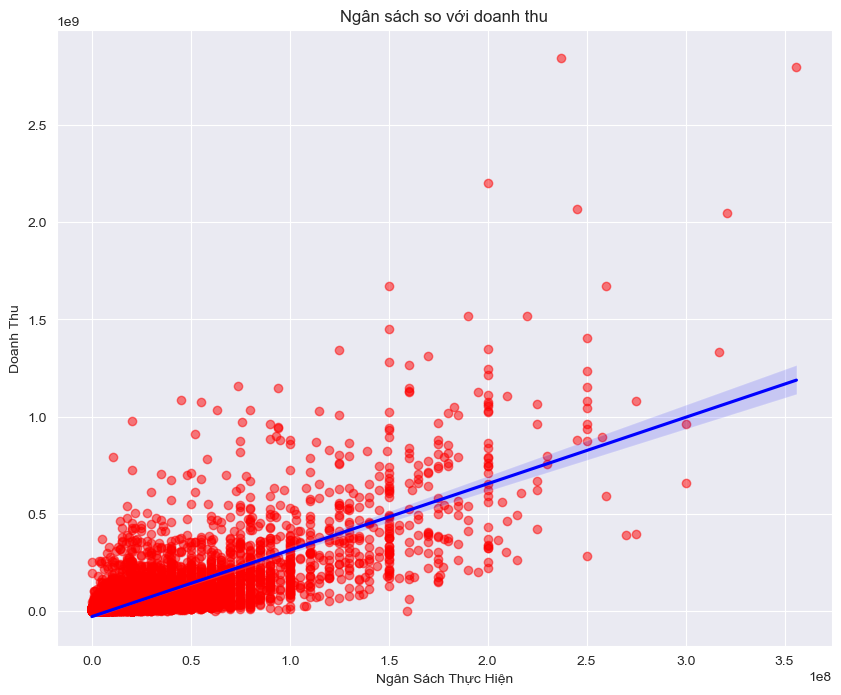

In [38]:
#Vẽ sơ đồ so sánh ngân sách so với doanh thu
budget_gross = df [['budget', 'gross', 'genre']]
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.regplot(x='budget', y='gross', data=budget_gross, color='#FF0000', scatter_kws={'alpha': 0.5},line_kws = {'color':'blue'})
plt.title('Ngân sách so với doanh thu')
plt.xlabel('Ngân Sách Thực Hiện')
plt.ylabel('Doanh Thu')
plt.show()

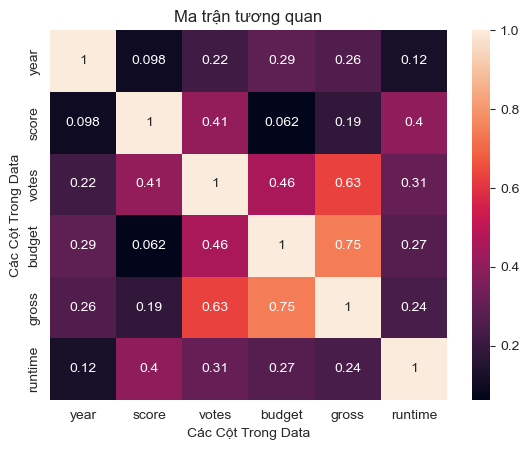

In [39]:
#Ma trận tương quan cho các cột dang số
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Ma trận tương quan')
plt.xlabel('Các Cột Trong Data')
plt.ylabel('Các Cột Trong Data')
plt.show()